# QuickEDA_AutonomicAging

## 1. Mô tả dữ liệu
Các tệp dữ liệu được cung cấp theo định dạng chuẩn WFDB mở và được đặt tên theo số liên tiếp sau khi sắp xếp ngẫu nhiên. Thông tin bệnh nhân bổ sung được lưu trữ trong tệp subject-info.csv . Để đảm bảo rằng không có đối tượng nào của chúng tôi có thể được xác định dựa trên thông tin nhân khẩu học, chúng tôi đã khái quát độ tuổi của cá nhân thành các nhóm tuổi. Chúng tôi đã sử dụng Data Anonymization Toolbox ARX miễn phí áp dụng điều kiện ẩn danh ak=2 và rủi ro nhận dạng lại trung bình dưới 5% [3-4].

Nhóm tuổi được xác định như sau: 1 (18-19 tuổi), 2 (20-24 tuổi), 3 (25-29 tuổi), 4 (30-34 tuổi), 5 (35-39 tuổi), 6 (40-44 tuổi), 7 (45-49 tuổi), 8 (50-54 tuổi), 9 (55-59 tuổi), 10 (60-64 tuổi), 11 (65-69 tuổi), 12 (70-74 tuổi), 13 (75-79 tuổi), 14 (80-84 tuổi), 15 (85-92 tuổi). Giới tính được mã hóa là 0 (nam) hoặc 1 (nữ). Thiết bị ghi là 0 (TFM, CNSystems) hoặc 1 (CNAP 500, CNSystems; MP150, BIOPAC Systems).

## 2. cấu trúc dữ liệu
1. Tệp .dat: Đây là tệp chứa dữ liệu thô của các tín hiệu đã ghi lại. Trong trường hợp của bộ dữ liệu "Autonomic Aging", tệp .dat sẽ chứa dữ liệu số của tín hiệu điện tâm đồ (ECG) và huyết áp (BP) theo thời gian. Dữ liệu này thường được lưu trữ dưới dạng các giá trị số (ví dụ: số nguyên 16 bit) tương ứng với biên độ của tín hiệu tại mỗi điểm lấy mẫu.

2. Tệp .hea: Đây là tệp "header" (tiêu đề) đi kèm với tệp .dat. Tệp này chứa các thông tin mô tả (metadata) về dữ liệu trong tệp .dat, bao gồm:

- Tên các tín hiệu (ví dụ: ECG, NIBP).
- Tần số lấy mẫu (sampling frequency) - cho biết có bao nhiêu điểm dữ liệu được ghi lại mỗi giây.
- Đơn vị đo lường của từng tín hiệu (ví dụ: mV cho ECG, mmHg cho huyết áp).
- Độ phân giải và định dạng lưu trữ của dữ liệu trong tệp .dat.
- Số lượng tín hiệu.
- Đôi khi có thể chứa thông tin bổ sung về bệnh nhân hoặc điều kiện ghi.

3. CSV
- ID
- Age_group: Nhóm tuổi được xác định như sau: 1 (18-19 tuổi), 2 (20-24 tuổi), 3 (25-29 tuổi), 4 (30-34 tuổi), 5 (35-39 tuổi), 6 (40-44 tuổi), 7 (45-49 tuổi), 8 (50-54 tuổi), 9 (55-59 tuổi), 10 (60-64 tuổi), 11 (65-69 tuổi), 12 (70-74 tuổi), 13 (75-79 tuổi), 14 (80-84 tuổi), 15 (85-92 tuổi).
- Sex: Giới tính được mã hóa là 0 (nam) hoặc 1 (nữ). 
- BMI: kg/m2
- Length: Thời lượng ghi tính bằng phút
- Device: Thiết bị ghi là 0 (TFM, CNSystems) hoặc 1 (CNAP 500, CNSystems; MP150, BIOPAC Systems).

In [6]:
import pandas as pd

subject_info = pd.read_csv("autonomic-aging-a-dataset-to-quantify-changes-of-cardiovascular-autonomic-function-during-healthy-aging-1.0.0/subject-info.csv")
subject_info.head()

,ID,Age_group,Sex,BMI,Length,Device
0,1,2.0,1.0,23.0,15,0
1,2,2.0,1.0,24.0,32,0
2,3,7.0,1.0,28.0,30,0
3,4,4.0,0.0,24.0,15,0
4,5,2.0,1.0,20.0,15,0


## 3. Xem tín hiệu thô

##### Thư viện cần dùng:

Thư viện wfdb (Waveform Database) là thư viện chính thức được PhysioNet khuyến khích sử dụng. Bạn có thể cài đặt nó bằng pip: pip install wfdb. Sau đó, bạn có thể dùng code Python để đọc cặp tệp .dat và .hea:

### Thử đọc file

In [9]:
import wfdb
import os


dataset_name = 'autonomic-aging-a-dataset-to-quantify-changes-of-cardiovascular-autonomic-function-during-healthy-aging-1.0.0'
# Tên bản ghi (ví dụ: bản ghi đầu tiên)
record_name = '0001'

path_file = os.path.join(dataset_name, record_name)

# Đọc bản ghi trực tiếp từ PhysioNet
try:
    record = wfdb.rdrecord(path_file)

    # `record` là một đối tượng Record chứa thông tin và dữ liệu

    print("Đã đọc thành công bản ghi:", record_name)

except Exception as e:
    print(f"Không thể đọc bản ghi {record_name}: {e}")
    print(f"Hãy chắc chắn rằng tên bản ghi '{record_name}' tồn tại trong bộ dữ liệu '{dataset_name}'.")

Đã đọc thành công bản ghi: 0001


### Thông tin từ file .hea

In [11]:
# Thông tin từ file .hea:
print("\n--- Thông tin Header ---")
print("1. Tên tín hiệu:", record.sig_name) # Ví dụ: ['ECG', 'NIBP']
print("2. Đơn vị:", record.units)       # Ví dụ: ['mV', 'mmHg']
print("3. Tần số lấy mẫu (Hz):", record.fs)
print("4. Số lượng tín hiệu:", record.n_sig)
print("5. Tổng số điểm lấy mẫu:", record.sig_len)
print("6. Thời gian bắt đầu:", record.base_time)
print("7. Ngày:", record.base_date)
print("8. Thông tin tùy chỉnh:", record.comments) # Có thể chứa thông tin về bệnh nhân (tuổi, giới tính, BMI)


--- Thông tin Header ---
Tên tín hiệu: ['ECG1', 'ECG2', 'NIBP']
Đơn vị: ['mV', 'mv', 'mmHg']
Tần số lấy mẫu (Hz): 1000
Số lượng tín hiệu: 3
Tổng số điểm lấy mẫu: 900401
Thời gian bắt đầu: None
Ngày: None
Thông tin tùy chỉnh: []


#### Giải thích thông tin từ file .hea

##### 1. Tên tín hiệu: ['ECG1', 'ECG2', 'NIBP']

- ECG1: Tín hiệu Điện tâm đồ (Electrocardiogram) kênh 1. ECG đo hoạt động điện của tim.
- ECG2: Tín hiệu Điện tâm đồ kênh 2. Có thể bản ghi này sử dụng hai đạo trình ECG khác nhau.
- NIBP: Tín hiệu Huyết áp không xâm lấn (Non-Invasive Blood Pressure). Đây là tín hiệu đo huyết áp liên tục mà không cần luồn ống vào động mạch.

##### 2. Đơn vị: ['mV', 'mv', 'mmHg']

- mV (millivolt): Đơn vị đo biên độ tín hiệu điện, thường dùng cho ECG. Có vẻ như có sự không nhất quán nhỏ về cách viết hoa (mV và mv), nhưng cả hai đều chỉ millivolt.
- mmHg (millimeters of mercury): Đơn vị đo áp suất, thường dùng cho huyết áp.

##### 3. Tần số lấy mẫu (Hz): 1000

Tần số 1000 Hz có nghĩa là mỗi giây, 1000 điểm dữ liệu (mẫu) được ghi lại cho mỗi tín hiệu (ECG1, ECG2, NIBP). Tần số lấy mẫu cao (1000 Hz là khá cao đối với tín hiệu sinh học thông thường) giúp ghi lại chi tiết các thay đổi nhanh chóng của tín hiệu, rất hữu ích cho phân tích chính xác.

##### 4. Số lượng tín hiệu: 3

Xác nhận rằng có tổng cộng 3 tín hiệu khác nhau được ghi lại cùng lúc trong bản ghi này, phù hợp với danh sách tên tín hiệu (ECG1, ECG2, NIBP).

##### 5. Tổng số điểm lấy mẫu: 900401

- Đây là tổng số điểm dữ liệu được ghi lại cho mỗi tín hiệu.
- Để tính tổng thời gian của bản ghi, bạn lấy Tổng số điểm lấy mẫu chia cho Tần số lấy mẫu: 900401 điểm/1000Hz=900.401 giây
- 900.401 giây ≈ 15 phút
- Như vậy, bản ghi này có độ dài khoảng 15 phút.
##### 6. Thời gian bắt đầu: None

Trường này thường lưu trữ thời gian cụ thể trong ngày khi quá trình ghi bắt đầu (giờ, phút, giây). Giá trị None cho thấy thông tin này không được lưu trữ hoặc không có sẵn trong tệp header này.
##### 7. Ngày: None

Trường này thường lưu trữ ngày tháng năm khi quá trình ghi diễn ra. Giá trị None cho thấy thông tin này không được lưu trữ hoặc không có sẵn.
##### 8.Thông tin tùy chỉnh: []

Đây là một danh sách dùng để lưu trữ các ghi chú hoặc thông tin bổ sung về bản ghi hoặc người tham gia (ví dụ: tuổi, giới tính, BMI, điều kiện ghi). Danh sách rỗng ([]) cho thấy không có thông tin tùy chỉnh nào được thêm vào phần header này.

### Dữ liệu tín hiệu từ file .dat

In [12]:
# Dữ liệu tín hiệu từ file .dat:
# record.p_signal là một mảng NumPy [số_điểm_lấy_mẫu, số_tín_hiệu]
print("\n--- Dữ liệu tín hiệu ---")
print("Kích thước mảng dữ liệu:", record.p_signal.shape)
print("10 điểm dữ liệu đầu tiên của tín hiệu 1 (ECG):", record.p_signal[:10, 0])
print("10 điểm dữ liệu đầu tiên của tín hiệu 2 (NIBP):", record.p_signal[:10, 1])


--- Dữ liệu tín hiệu ---
Kích thước mảng dữ liệu: (900401, 3)
10 điểm dữ liệu đầu tiên của tín hiệu 1 (ECG): [0.18632674 0.18979468 0.19848593 0.20370924 0.20370924 0.20195387
 0.19792935 0.18979468 0.1886387  0.19210664]
10 điểm dữ liệu đầu tiên của tín hiệu 2 (NIBP): [-0.05405465 -0.06737562 -0.07547887 -0.07373964 -0.06563638 -0.06449007
 -0.05695997 -0.04595139 -0.04595139 -0.04132661]


### Truy cập dữ liệu của một tín hiệu cụ thể theo tên

In [13]:
# Truy cập dữ liệu của một tín hiệu cụ thể theo tên
if 'ECG' in record.sig_name:
    ecg_index = record.sig_name.index('ECG')
    ecg_data = record.p_signal[:, ecg_index]
    print("\nKích thước dữ liệu ECG:", ecg_data.shape)

if 'NIBP' in record.sig_name:
    nibp_index = record.sig_name.index('NIBP')
    nibp_data = record.p_signal[:, nibp_index]
    print("Kích thước dữ liệu NIBP:", nibp_data.shape)

Kích thước dữ liệu NIBP: (900401,)


### Biểu đồ tín hiệu

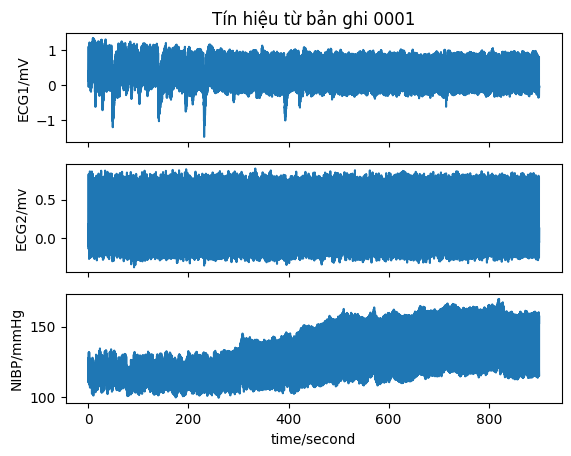

In [17]:
import wfdb
import matplotlib.pyplot as plt

dataset_name = 'autonomic-aging-a-dataset-to-quantify-changes-of-cardiovascular-autonomic-function-during-healthy-aging-1.0.0'
# Tên bản ghi (ví dụ: bản ghi đầu tiên)
record_name = '0001'

path_file = os.path.join(dataset_name, record_name)

try:
    record = wfdb.rdrecord(path_file)

    # Vẽ tất cả các tín hiệu trong bản ghi
    wfdb.plot_wfdb(record=record, title=f'Tín hiệu từ bản ghi {record_name}')

    # Nếu bạn chỉ muốn vẽ một vài tín hiệu cụ thể
    # wfdb.plot_wfdb(record=record, sig_indexes=[0, 1], title=f'Tín hiệu từ bản ghi {record_name}')

    plt.show()

except Exception as e:
    print(f"Không thể vẽ biểu đồ cho bản ghi {record_name}: {e}")

GEMINI: Dựa vào đồ thị bạn cung cấp, đây là giải thích chi tiết các tín hiệu được hiển thị:

Đồ thị hiển thị các tín hiệu sinh học được ghi lại trong **bản ghi 0001** của bộ dữ liệu "Autonomic Aging" trong khoảng thời gian xấp xỉ 900 giây (15 phút). Nó bao gồm ba biểu đồ con, mỗi biểu đồ biểu diễn một loại tín hiệu khác nhau theo thời gian:

#### 1. Biểu đồ trên cùng (ECG1/mV):

* Đây là tín hiệu **Điện tâm đồ (ECG)** từ kênh 1, với đơn vị đo là millivolt (mV).
* Bạn có thể thấy rõ các "đỉnh" nhọn lặp đi lặp lại, đó là các phức bộ QRS, biểu thị nhịp đập của tim.
* Độ dày đặc của các phức bộ QRS cho biết nhịp tim trung bình trong suốt bản ghi.
* Sự thay đổi nhỏ trong khoảng thời gian giữa các đỉnh QRS (khoảng RR) biểu thị **biến thiên nhịp tim (HRV)**, một chỉ số quan trọng của chức năng hệ thần kinh tự chủ.

#### 2. Biểu đồ ở giữa (ECG2/mV):

* Đây là tín hiệu **Điện tâm đồ (ECG)** từ kênh 2, cũng đo bằng millivolt (mV).
* Tín hiệu này tương tự như ECG1, cho thấy hoạt động điện của tim được ghi lại từ một vị trí hoặc đạo trình khác trên cơ thể.
* Sự khác biệt về hình dạng (biên độ, hình thái) giữa ECG1 và ECG2 là bình thường tùy thuộc vào vị trí đặt điện cực.

#### 3. Biểu đồ dưới cùng (NIBP/mmHg):

* Đây là tín hiệu **Huyết áp không xâm lấn (NIBP)**, với đơn vị đo là milimét thủy ngân (mmHg).
* Biểu đồ này cho thấy các sóng nhịp nhàng, với mỗi sóng tương ứng với một nhịp tim.
* Phần đỉnh của mỗi sóng là huyết áp tâm thu (Systolic Blood Pressure), và phần đáy là huyết áp tâm trương (Diastolic Blood Pressure).
* Bạn có thể thấy rõ sự dao động của huyết áp theo từng nhịp đập.
* **Quan sát đáng chú ý:** Tín hiệu huyết áp (NIBP) dường như ổn định trong khoảng 300 giây đầu tiên, sau đó có xu hướng tăng dần từ khoảng giây thứ 300 đến khoảng giây thứ 600, rồi duy trì ở mức cao hơn trong phần còn lại của bản ghi. Sự thay đổi này có thể là một phản ứng sinh lý hoặc sự điều chỉnh của cơ thể trong quá trình ghi.

---

**Tổng kết, đồ thị này cho bạn biết:**

* Bản ghi 0001 chứa các tín hiệu ECG (hai kênh) và huyết áp không xâm lấn được ghi lại đồng thời trong khoảng 15 phút.
* Tín hiệu ECG cho thấy nhịp tim và có thể được phân tích để đánh giá HRV.
* Tín hiệu NIBP cho thấy huyết áp liên tục theo thời gian và có thể được phân tích để đánh giá huyết áp trung bình, huyết áp tâm thu/tâm trương, và biến thiên huyết áp.
* Có một sự thay đổi rõ rệt trong tín hiệu huyết áp trong quá trình ghi, với xu hướng tăng lên trong giai đoạn giữa của bản ghi.

Đồ thị này là điểm khởi đầu để bạn phân tích định lượng sâu hơn các đặc điểm của từng tín hiệu và mối quan hệ giữa chúng, nhằm hiểu rõ hơn về chức năng tim mạch tự chủ của người tham gia trong bản ghi này.

### Một số chỉ số

Dưới đây là giải thích dễ hiểu cho từng khái niệm bạn hỏi, tất cả đều là các chỉ số sinh lý học thường dùng trong **phân tích tín hiệu tim mạch và thần kinh tự động**:

---

#### **1. HRV – Heart Rate Variability (Biến thiên nhịp tim)**

* **Là gì?**: Là sự thay đổi khoảng thời gian giữa các nhịp tim liên tiếp (các khoảng RR trên ECG).
* **Ý nghĩa**: Phản ánh mức độ linh hoạt và điều tiết của hệ thần kinh tự động (autonomic nervous system – ANS). HRV cao thường liên quan đến sức khỏe tim mạch tốt và khả năng phục hồi cao.
* **Các chỉ số phổ biến**:

  * **SDNN**: Độ lệch chuẩn của tất cả các khoảng RR.
  * **RMSSD**: Căn bậc hai của giá trị trung bình bình phương sai khác giữa các khoảng RR liên tiếp (nhạy với hoạt động phó giao cảm).
  * **LF/HF**: Tỷ số giữa dao động tần số thấp và cao (phản ánh cân bằng thần kinh giao cảm – phó giao cảm).

---

#### **2. BPV – Blood Pressure Variability (Biến thiên huyết áp)**

* **Là gì?**: Là mức độ dao động của huyết áp theo thời gian (thường là huyết áp tâm thu hoặc tâm trương).
* **Ý nghĩa**: Tương tự HRV, nhưng áp dụng cho huyết áp. BPV cao bất thường có thể liên quan đến nguy cơ đột quỵ, tổn thương cơ quan, hoặc lão hóa mạch máu.
* **Phân tích**: Sử dụng tín hiệu huyết áp động mạch liên tục để tính toán các chỉ số như SD, Coefficient of Variation (CV), hoặc phân tích phổ tần.

---

#### **3. Baroreflex Sensitivity (Độ nhạy phản xạ baroreceptor)**

* **Là gì?**: Baroreflex là phản xạ điều hòa huyết áp tự động: khi huyết áp tăng, nhịp tim giảm và ngược lại.
* **Độ nhạy baroreflex** (**BRS**): là tốc độ điều chỉnh nhịp tim khi có thay đổi về huyết áp.
* **Đo lường**: Dựa trên mối tương quan giữa thay đổi huyết áp và thay đổi khoảng RR. Giá trị BRS thấp thường thấy ở người lớn tuổi hoặc có bệnh tim mạch.

---

#### **4. Động lực học xung mạch (Pulse Wave Dynamics / Pulse Wave Velocity – PWV)**

* **Là gì?**: Là các chỉ số về sự lan truyền của sóng mạch (pulse wave) qua hệ thống động mạch.
* **PWV (Vận tốc sóng mạch)**: Tốc độ truyền sóng áp lực từ tim đến các phần khác của cơ thể. PWV cao → động mạch cứng hơn → dấu hiệu lão hóa mạch máu.
* **Dữ liệu đo**: Từ tín hiệu huyết áp hoặc PPG (photoplethysmography).

---

#### **5. Chỉ số QT (QT Interval)**

* **Là gì?**: Khoảng thời gian từ khởi đầu sóng Q đến cuối sóng T trong ECG – đại diện cho thời gian khử cực và tái cực của tâm thất.
* **QTc (QT hiệu chỉnh)**: Điều chỉnh QT theo nhịp tim (vì QT bị ảnh hưởng bởi tần số tim).
* **Ý nghĩa**:

  * QT quá dài → nguy cơ loạn nhịp nguy hiểm như torsades de pointes.
  * QT ngắn cũng có thể nguy hiểm.
* **Chỉ số này** phản ánh tính ổn định điện học của tim.

---

#### **Tóm tắt so sánh**:

| Chỉ số         | Dữ liệu gốc | Đo lường | Phản ánh điều gì?                       |
| -------------- | ----------- | -------- | --------------------------------------- |
| HRV            | ECG         | ms       | Điều hòa nhịp tim bởi thần kinh tự động |
| BPV            | Huyết áp    | mmHg     | Ổn định huyết áp                        |
| Baroreflex     | ECG + BP    | ms/mmHg  | Phản xạ điều chỉnh tim do thay đổi BP   |
| Pulse dynamics | BP hoặc PPG | m/s      | Độ đàn hồi động mạch                    |
| QT/QTc         | ECG         | ms       | Tính ổn định điện học của tim           |

---

Nếu bạn cần cách tính toán cụ thể các chỉ số này bằng Python hoặc các thư viện (ví dụ `neurokit2`, `pyHRV`, `biosppy`,...), mình cũng có thể cung cấp.


#### Tiền xử lý dữ liệu

- Các đỉnh R được trích xuất từ bản ghi ECG thô và chuỗi RRI được tạo ra bằng gói NeuroKit2.
- Giảm nhiễu trong tín hiệu ECG thô bằng cách sử dụng bộ lọc thông cao (Butterworth, bậc 5, 0.5 Hz), sau đó là bộ lọc khía đường dây điện.
- Chuỗi RRI sau đó được nội suy thành 4 Hz.
- Một cửa sổ trượt không chồng lấn đã được áp dụng cho toàn bộ độ dài dữ liệu RRI của mỗi đối tượng để tạo ra các chuỗi RRI dài 5 phút, tạo ra tổng cộng 3606 mẫu RRI dài 5 phút từ 1093 đối tượng

1. so sánh 2 thiết bị
2. Xác định window size nhỏ nhất để dự đoán tuổi
3. Phân đoạn dữ liệu theo chu kì nhịp tim hay window size
4. Xử lý dữ liệu bị thiếu như thế nào?

##